# MIT 801 - SL Assignment 1

## Question 1 - Bootstrapping

In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import statsmodels.api as sm

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [4]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [6]:
HousePrices = pd.read_excel('House Prices.xlsx')

In [7]:
HousePrices.drop("No", axis=1, inplace=True)

In [8]:
HousePrices.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [9]:
 # Independent variables
X = HousePrices.drop('Y house price of unit area', axis=1)
# Dependent variable
y = HousePrices['Y house price of unit area'] 

In [10]:
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Add constant for the intercept term for y
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [12]:
model = sm.OLS(y_train, X_train).fit()

In [13]:
model

In [14]:
y_pred = model.predict(X_test)

In [15]:
# Number of bootstrap samples
n_bootstraps = 5000
intercepts = []

# Perform bootstrapping
for _ in range(n_bootstraps):
    # Create a bootstrap sample
    X_resampled, y_resampled = resample(X_train, y_train, random_state=np.random.randint(0, 10000))
    
    # Fit the model to the bootstrap sample
    bootstrap_model = sm.OLS(y_resampled, X_resampled).fit()
    # Store the intercept
    intercepts.append(bootstrap_model.params[0])  # Intercept is the first parameter

# Calculate the standard error of the intercept
intercept_std_error = np.std(intercepts)

# Calculate the 95% confidence interval for the intercept using standard error, # 1.96 for 95% confidence interval
margin_of_error = 1.96 * intercept_std_error 
lower_bound = np.mean(intercepts) - margin_of_error
upper_bound = np.mean(intercepts) + margin_of_error

print(f'95% confidence interval for the intercept: [{lower_bound}, {upper_bound}]')

95% confidence interval for the intercept: [-26167.596698734757, -238.0108412256559]


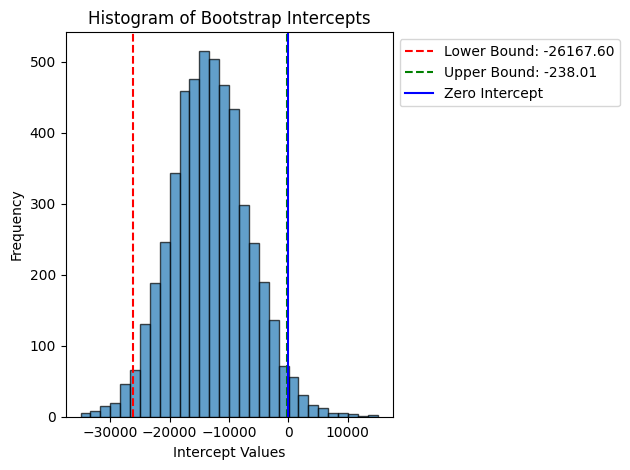

In [16]:
plt.hist(intercepts, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(x=lower_bound, color='r', linestyle='--', label=f'Lower Bound: {lower_bound:.2f}')
plt.axvline(x=upper_bound, color='g', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')
plt.axvline(x=0, color='b', linestyle='-', label='Zero Intercept')
plt.xlabel('Intercept Values')
plt.ylabel('Frequency')
plt.title('Histogram of Bootstrap Intercepts')

# Legend position
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0,1, 1])  # Adjust layout to make space for the legend
plt.show()

In [17]:
# Hypothesis Test
if lower_bound > 0 or upper_bound < 0:
    print("Reject the null hypothesis that the intercept is equal to 0 at the 5% significance level.")
else:
    print("Fail to reject the null hypothesis that the intercept is equal to 0 at the 5% significance level.")

Reject the null hypothesis that the intercept is equal to 0 at the 5% significance level.


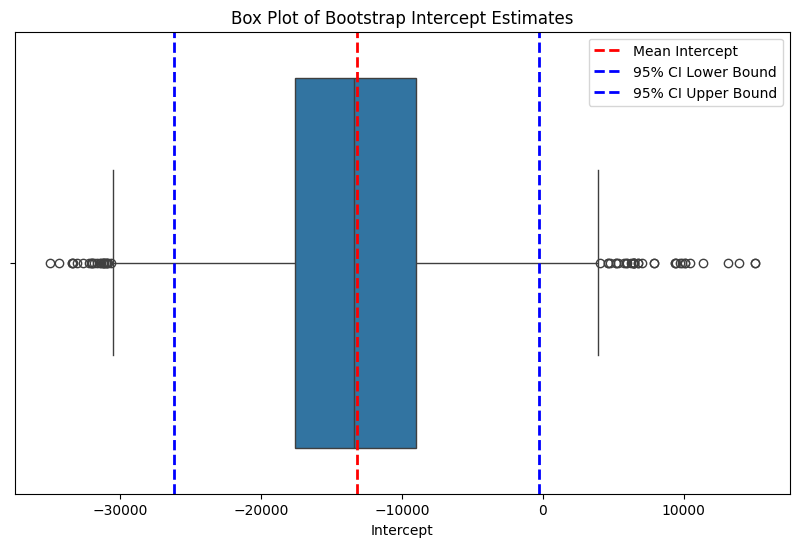

In [18]:
mean_intercept = np.mean(intercepts)

plt.figure(figsize=(10, 6))
sns.boxplot(x=intercepts)
plt.axvline(mean_intercept, color='red', linestyle='dashed', linewidth=2, label='Mean Intercept')
plt.axvline(lower_bound, color='blue', linestyle='dashed', linewidth=2, label='95% CI Lower Bound')
plt.axvline(upper_bound, color='blue', linestyle='dashed', linewidth=2, label='95% CI Upper Bound')
plt.title('Box Plot of Bootstrap Intercept Estimates')
plt.xlabel('Intercept')
plt.legend()
plt.show()

# Question 2.1 - Clustering

In [19]:
Mode1 = pd.read_excel('mode1.xlsx')

In [20]:
Mode1.head()

,X
0,95.795
1,235.536
2,125.419
3,194.497
4,124.638


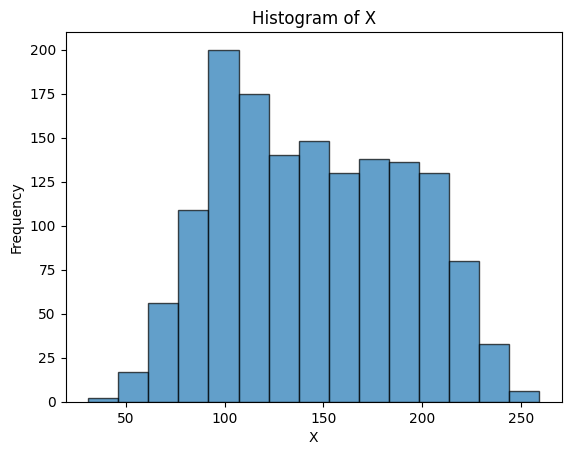

In [21]:
# Plot the histogram
plt.hist(Mode1, bins=15, edgecolor='k', alpha=0.7)
plt.xlabel('X')
plt.ylabel('Frequency')
plt.title('Histogram of X')
plt.show()

2 clusters ( groups a 25 unit difference between x values).

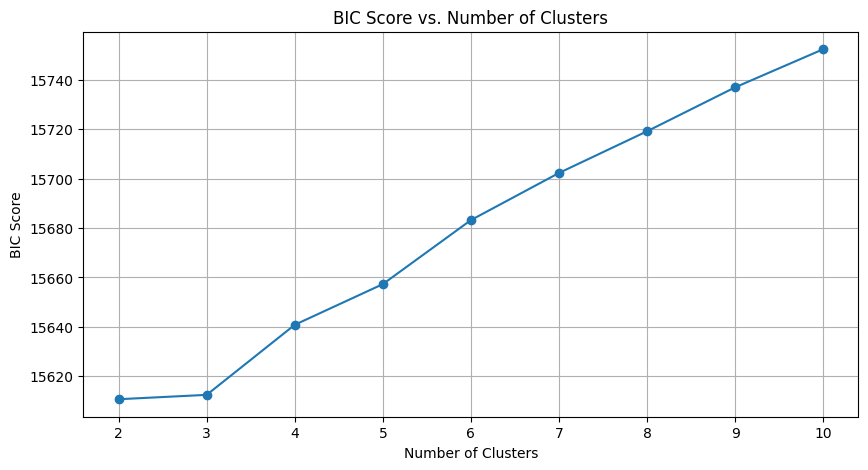

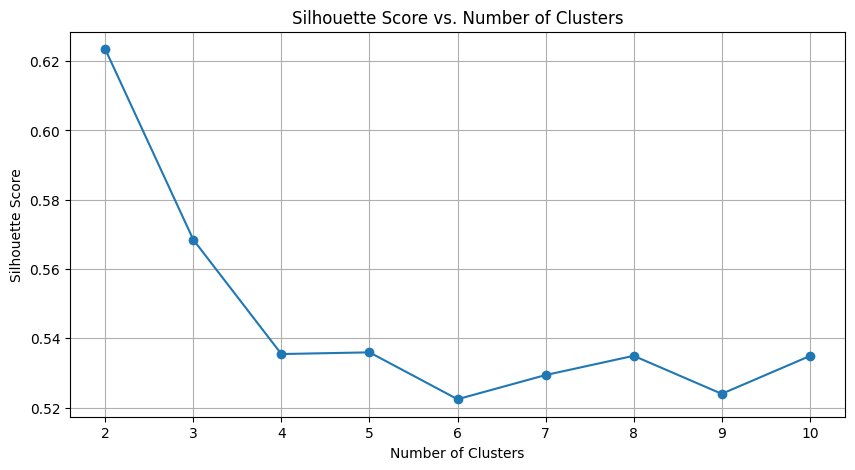

In [22]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

X= Mode1.values
# Initialize lists to store evaluation metrics
bic_scores = []
silhouette_scores = []

# Define a range of cluster numbers to try
num_clusters_range = range(2, 11)  # Try cluster numbers from 2 to 10

# Fit GMM with different numbers of clusters and evaluate performance
for num_clusters in num_clusters_range:
    gmm = GaussianMixture(n_components=num_clusters, random_state=0)
    gmm.fit(X)
    
    # Calculate BIC score
    bic_scores.append(gmm.bic(X))
    
    # Calculate silhouette score
    if num_clusters > 1:  # Silhouette score requires at least 2 clusters
        labels = gmm.predict(X)
        silhouette_scores.append(silhouette_score(X, labels))
    else:
        silhouette_scores.append(None)  # Set None for 1 cluster (silhouette score undefined)

# Plot BIC scores
plt.figure(figsize=(10, 5))
plt.plot(num_clusters_range, bic_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.title('BIC Score vs. Number of Clusters')
plt.grid(True)
plt.show()

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(num_clusters_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()


In [23]:
# Fit the Gaussian Mixture Model with the optimal number of clusters
X = Mode1.values
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X)

# Predict the cluster labels for the data
cluster_labels = gmm.predict(X)

# Create a DataFrame with the predicted cluster labels
X_with_labels = Mode1.copy()
X_with_labels['Cluster'] = cluster_labels

# Examine the characteristics of the clusters
cluster_means = X_with_labels.groupby('Cluster').mean()
cluster_std = X_with_labels.groupby('Cluster').std()

# Display the characteristics of the clusters
print("Cluster Means:")
print(cluster_means)

print("\nCluster Standard Deviations:")
print(cluster_std)

Cluster Means:
                  X
Cluster            
0        109.424970
1        189.284295

Cluster Standard Deviations:
                 X
Cluster           
0        23.376170
1        24.107206


In [24]:
# Assuming cluster_labels contains the cluster labels assigned to each data point
unique_clusters, cluster_counts = np.unique(cluster_labels, return_counts=True)

# Printing the cluster sizes
for cluster, count in zip(unique_clusters, cluster_counts):
    print(f"Cluster {cluster}: Size {count}")


Cluster 0: Size 822
Cluster 1: Size 678


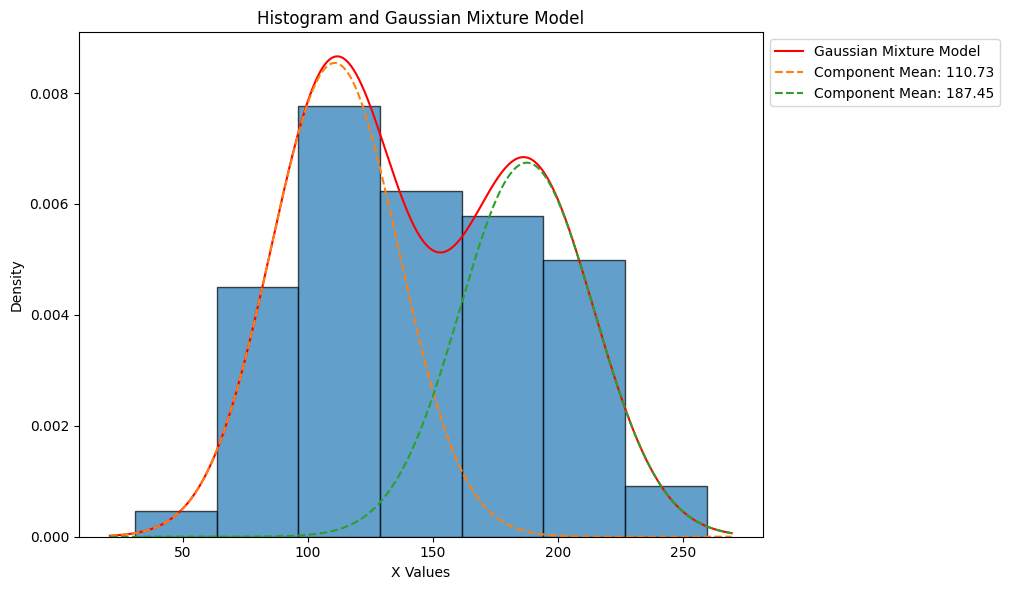

In [25]:
# Get the Gaussian Mixture parameters
means = gmm.means_.flatten()
covariances = gmm.covariances_.flatten()
weights = gmm.weights_.flatten()
means,covariances,weights

# Generate a range of values for X to plot the GMM
x = np.linspace(Mode1['X'].min() - 10, Mode1['X'].max() + 10, 1000)
logprob = gmm.score_samples(x.reshape(-1, 1))
pdf = np.exp(logprob)

plt.figure(figsize=(12, 6))
# Plot the histogram of the original data
plt.hist(X, bins=7, density=True, edgecolor='k', alpha=0.7)

# Plot the Gaussian Mixture Model
plt.plot(x, pdf, label='Gaussian Mixture Model', color='r')

# Adding individual Gaussian components
for mean, cov, weight in zip(means, covariances, weights):
    component_pdf = weight * (1 / np.sqrt(2 * np.pi * cov)) * np.exp(-0.5 * ((x - mean) ** 2 / cov))
    plt.plot(x, component_pdf, linestyle='--', label=f'Component Mean: {mean:.2f}')

plt.xlabel('X Values')
plt.ylabel('Density')
plt.title('Histogram and Gaussian Mixture Model')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for the legend
plt.show()

# Question 2.2 - Clustering

In [26]:
Mode2 = pd.read_excel('mode2.xlsx', skiprows=2)

In [27]:
Mode2.head()

,X1,X2
0,107.705,95.795
1,85.020,235.536
2,154.556,125.419
3,119.904,194.497
4,131.874,124.638


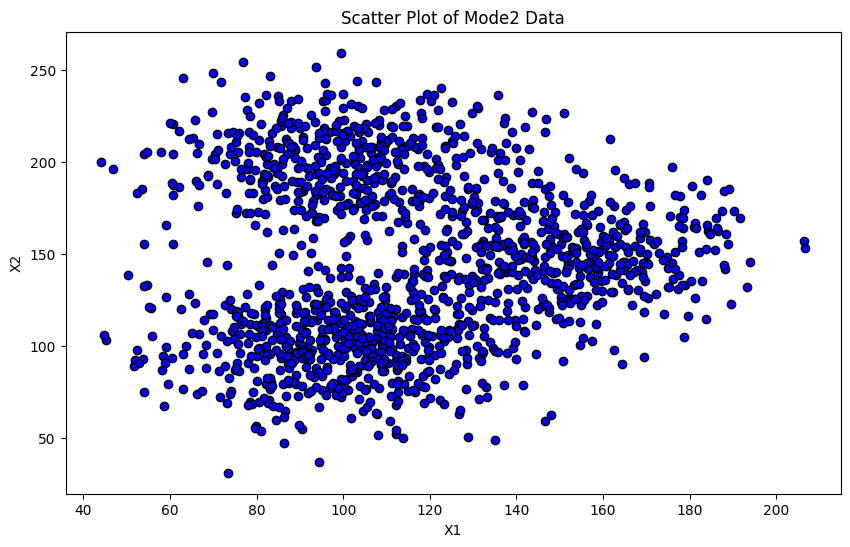

In [28]:
# Assuming Mode2 has two columns X1 and X2
plt.figure(figsize=(10, 6))
plt.scatter(Mode2.iloc[:, 0], Mode2.iloc[:, 1], c='blue', marker='o', edgecolor='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of Mode2 Data')
plt.show()

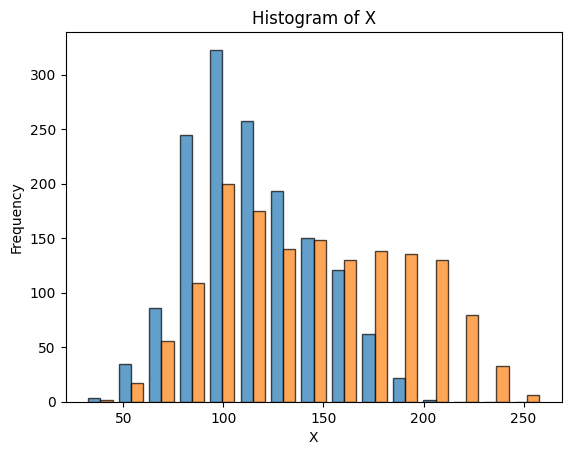

In [29]:
# Plot the histogram
plt.hist(Mode2, bins=15, edgecolor='k', alpha=0.7)
plt.xlabel('X')
plt.ylabel('Frequency')
plt.title('Histogram of X')
plt.show()

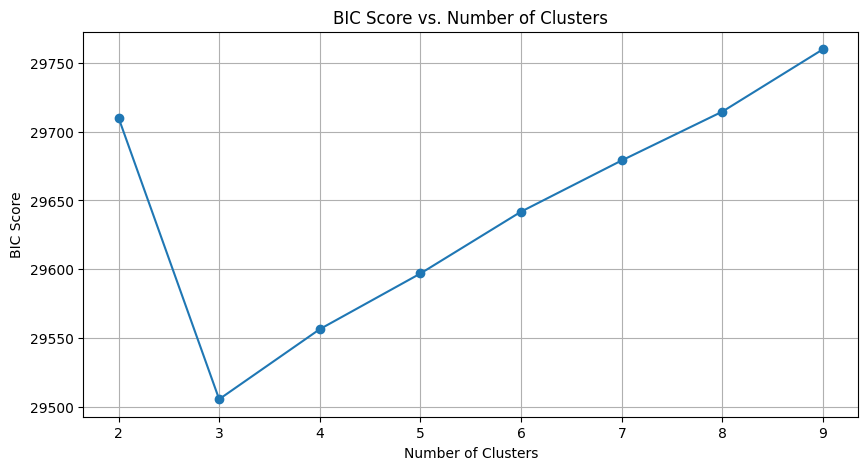

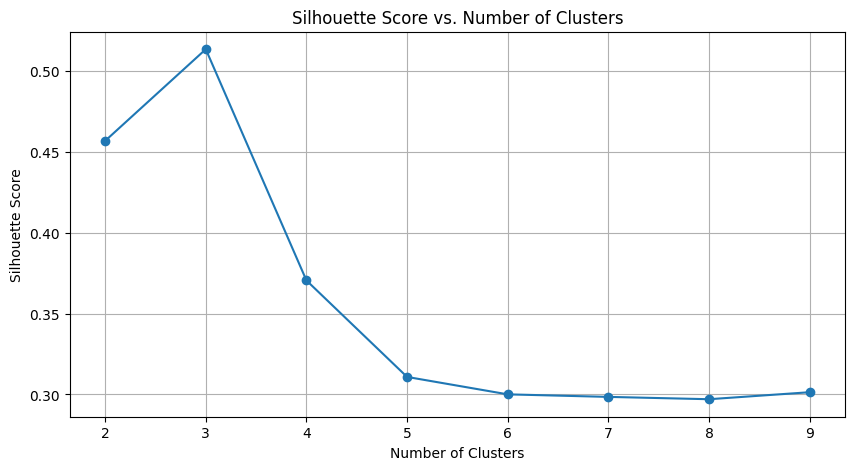

In [30]:
X = Mode2.values

# Initialize lists to store evaluation metrics
bic_scores = []
silhouette_scores = []

# Define a range of cluster numbers to try
num_clusters_range = range(2, 10) 

# Fit GMM with different numbers of clusters and evaluate performance
for num_clusters in num_clusters_range:
    gmm = GaussianMixture(n_components=num_clusters, random_state=0)
    gmm.fit(X)
    
    # Calculate BIC score
    bic_scores.append(gmm.bic(X))
    
    # Calculate silhouette score
    if num_clusters > 1:  # Silhouette score requires at least 2 clusters
        labels = gmm.predict(X)
        silhouette_scores.append(silhouette_score(X, labels))
    else:
        silhouette_scores.append(None)  # Set None for 1 cluster (silhouette score undefined)

# Plot BIC scores
plt.figure(figsize=(10, 5))
plt.plot(num_clusters_range, bic_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.title('BIC Score vs. Number of Clusters')
plt.grid(True)
plt.show()

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(num_clusters_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()


In [31]:

# Fit the Gaussian Mixture Model with the optimal number of clusters (let's assume n=2 for this example)
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X)

# Predict the cluster labels for the data
cluster_labels = gmm.predict(X)

# Create a DataFrame with the predicted cluster labels
Mode2_with_labels = Mode2.copy()
Mode2_with_labels['Cluster'] = cluster_labels

# Examine the characteristics of the clusters
cluster_means = Mode2_with_labels.groupby('Cluster').mean()
cluster_std = Mode2_with_labels.groupby('Cluster').std()

# Display the characteristics of the clusters
print("Cluster Means:")
print(cluster_means)

print("\nCluster Standard Deviations:")
print(cluster_std)

Cluster Means:
                 X1          X2
Cluster                        
0        152.105613  149.205660
1         99.638178  200.529447
2         99.612900  100.462751

Cluster Standard Deviations:
                X1         X2
Cluster                      
0        18.137603  19.179587
1        19.898078  19.629373
2        19.271506  19.846165


In [32]:
# Assuming cluster_labels contains the cluster labels assigned to each data point
unique_clusters, cluster_counts = np.unique(cluster_labels, return_counts=True)

# Printing the cluster sizes
for cluster, count in zip(unique_clusters, cluster_counts):
    print(f"Cluster {cluster}: Size {count}")

Cluster 0: Size 432
Cluster 1: Size 465
Cluster 2: Size 603


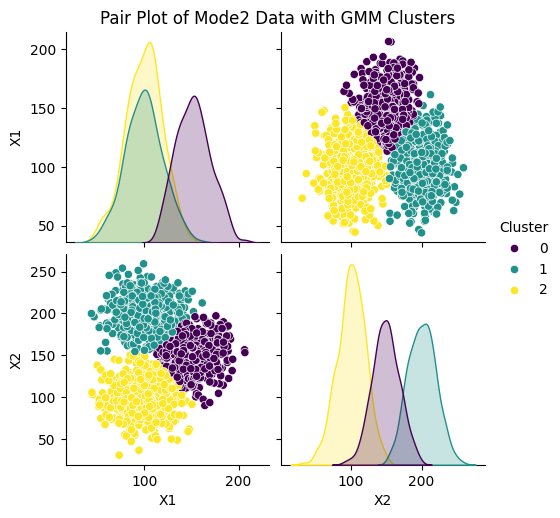

In [33]:
# Pair plot of the data with cluster labels
sns.pairplot(Mode2_with_labels, hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Mode2 Data with GMM Clusters', y=1.02)
plt.show()